<a href="https://colab.research.google.com/github/Juanchi97/CoderHouseDataScience/blob/main/Entrega1/ProyectoFinalGutierrezJuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias y Bibliotecas


## Dependencias necesarias

In [ ]:
!pip install pandas matplotlib seaborn wordcloud kaggle

## Bibliotecas importadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import os
from google.colab import files

## Estilo de graficos


In [ ]:
sns.set_style('whitegrid')
sns.set_palette('husl')

# Kaggle API

## 1. Subir kaggle.json

In [ ]:
print("Sube tu archivo kaggle.json")
uploaded = files.upload()

Sube tu archivo kaggle.json


Saving kaggle.json to kaggle.json


## 2. Mover kaggle.json al directorio correcto

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 3. Descargar el dataset de Udemy desde Kaggle

In [ ]:
!kaggle datasets download -d andrewmvd/udemy-courses

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/udemy-courses
License(s): other
udemy-courses.zip: Skipping, found more recently modified local copy (use --force to force download)


## 4. Descomprimir el dataset

In [ ]:
!unzip udemy-courses.zip

Archive:  udemy-courses.zip
replace udemy_courses.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Dataset

## Carga Dataset


In [ ]:
udemy_file = 'udemy_courses.csv'
df = pd.read_csv(udemy_file)

## Filtrar cursos de marketing digital

In [ ]:
df = df[df['course_title'].str.contains('marketing|digital marketing|seo|social media', case=False, na=False) |
        df['subject'].str.contains('marketing', case=False, na=False)]

## Renombrar columnas

In [ ]:
df = df.rename(columns={
    'course_title': 'course_title',
    'num_subscribers': 'students_enrolled',
    'num_reviews': 'reviews_count',
    'price': 'price',
    'content_duration': 'duration_hours',
    'published_timestamp': 'last_updated'
})

## Convertir

In [ ]:
df['last_updated'] = pd.to_datetime(df['last_updated'], utc=True, errors='coerce')

## Seleccionar columnas relevantes

In [ ]:
df = df[['course_title', 'students_enrolled', 'reviews_count', 'price', 'duration_hours', 'last_updated']]

## Crear subcategorías de marketing digital

In [ ]:
def asignar_subcategoria(titulo):
    titulo = titulo.lower()
    if 'seo' in titulo:
        return 'SEO'
    elif 'social media' in titulo or 'facebook' in titulo or 'instagram' in titulo:
        return 'Redes Sociales'
    elif 'analytics' in titulo or 'google analytics' in titulo:
        return 'Analítica'
    elif 'ppc' in titulo or 'google ads' in titulo or 'adwords' in titulo:
        return 'PPC'
    else:
        return 'General'

df['category'] = df['course_title'].apply(asignar_subcategoria)

## Calificaciones

In [ ]:
df['rating'] = np.random.uniform(3.5, 5.0, len(df))

# Limpieza de datos

## Eliminar duplicados

In [ ]:
df = df.drop_duplicates(subset=['course_title'])

## Manejar valores nulos

In [ ]:
df = df.fillna({
    'rating': df['rating'].mean(),
    'students_enrolled': 0,
    'price': 0,
    'reviews_count': 0,
    'duration_hours': df['duration_hours'].mean(),
    'last_updated': df['last_updated'].mode()[0]
})


## Normalizar títulos

In [ ]:
df['course_title'] = df['course_title'].str.lower().str.replace(r'[^\w\s]', '')

## Crear columnas adicionales

In [ ]:
df['ratio_engagement'] = df['reviews_count'] / df['students_enrolled'].replace(0, 1)
df['year_updated'] = df['last_updated'].dt.year
df['year_updated'] = df['year_updated'].fillna(df['year_updated'].mode()[0])

# Análisis Exploratorio de Datos (EDA)

## 1. Popularidad: Estudiantes inscritos por subcategoría

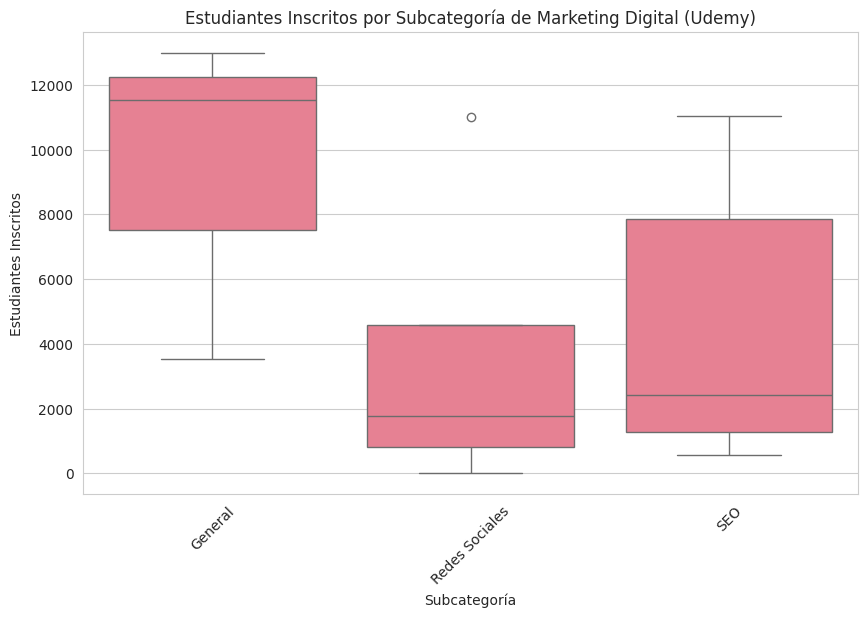

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='students_enrolled', data=df)
plt.title('Estudiantes Inscritos por Subcategoría de Marketing Digital (Udemy)')
plt.xlabel('Subcategoría')
plt.ylabel('Estudiantes Inscritos')
plt.xticks(rotation=45)
plt.savefig('estudiantes_inscritos.png')
plt.show()
plt.close()

## 2. Calidad: Distribución de calificaciones por subcategoría

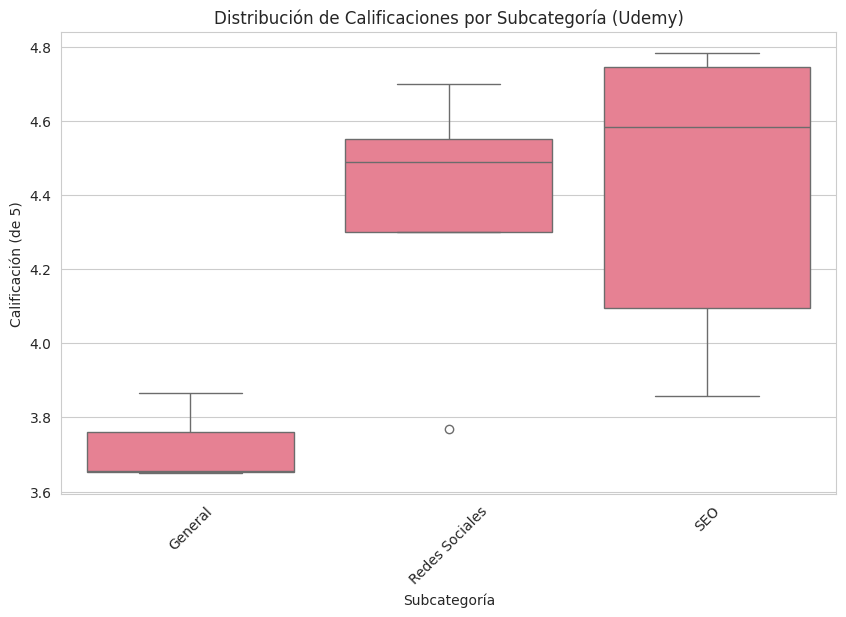

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='rating', data=df)
plt.title('Distribución de Calificaciones por Subcategoría (Udemy)')
plt.xlabel('Subcategoría')
plt.ylabel('Calificación (de 5)')
plt.xticks(rotation=45)
plt.savefig('distribucion_calificaciones.png')
plt.show()
plt.close()

## 3. Frecuencia de Actualización

<Figure size 1200x600 with 0 Axes>

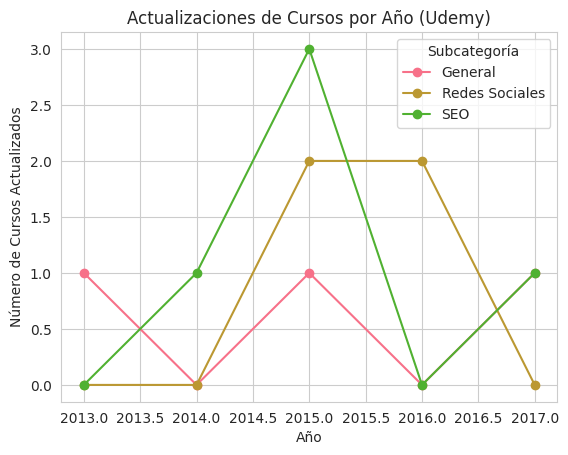

In [ ]:
updates_by_year = df.groupby(['category', 'year_updated']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
updates_by_year.T.plot(kind='line', marker='o')
plt.title('Actualizaciones de Cursos por Año (Udemy)')
plt.xlabel('Año')
plt.ylabel('Número de Cursos Actualizados')
plt.legend(title='Subcategoría')
plt.savefig('actualizaciones_por_anio.png')
plt.show()
plt.close()

## 4. Distribución de Subcategorías

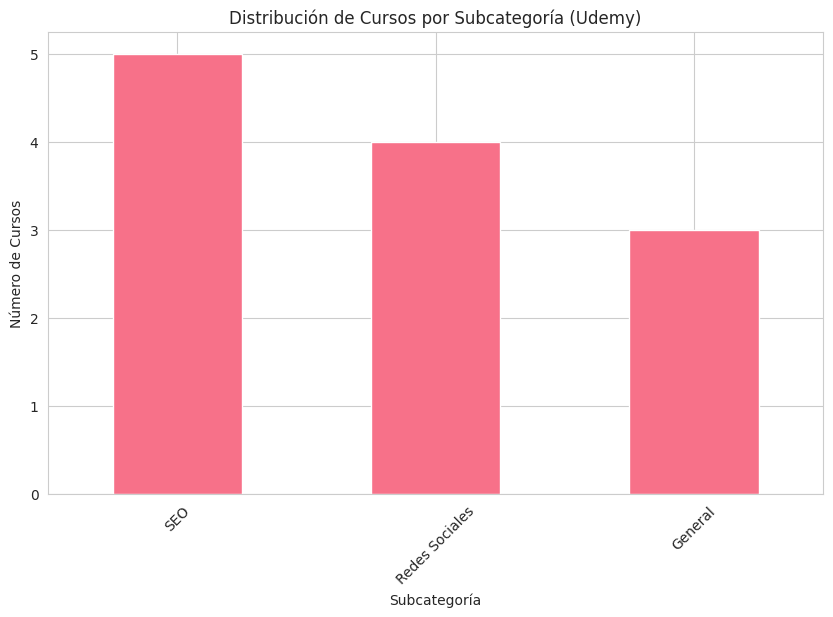

In [ ]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribución de Cursos por Subcategoría (Udemy)')
plt.xlabel('Subcategoría')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=45)
plt.savefig('categorias_cursos.png')
plt.show()
plt.close()

## 5. Nube de Palabras para Títulos de Cursos

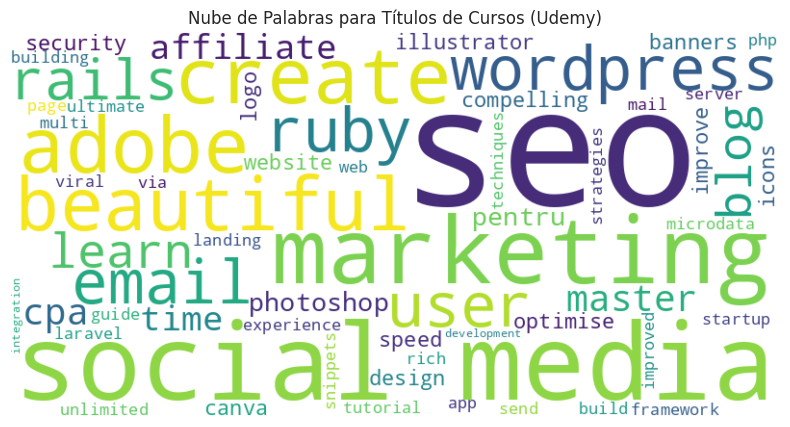

In [ ]:
def generar_nube_palabras(texto, nombre_archivo):
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras para Títulos de Cursos (Udemy)')
    plt.savefig(nombre_archivo)
    plt.show()
    plt.close()

texto = ' '.join(df['course_title'])
generar_nube_palabras(texto, 'nube_udemy.png')

## 6. Precio vs. Calificación

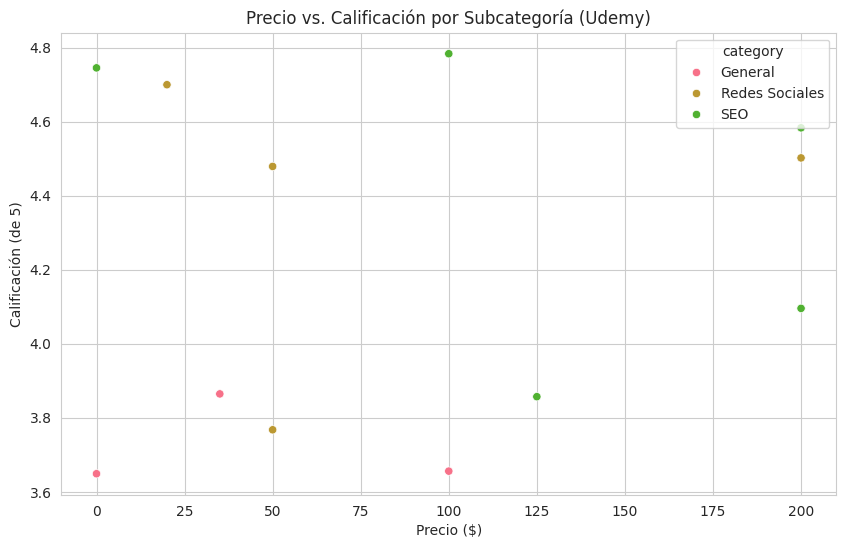

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', hue='category', data=df)
plt.title('Precio vs. Calificación por Subcategoría (Udemy)')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación (de 5)')
plt.savefig('precio_vs_calificacion.png')
plt.show()
plt.close()

## Resumen estadístico

In [ ]:
resumen = df.groupby('category').agg({
    'students_enrolled': 'mean',
    'rating': 'mean',
    'price': 'mean',
    'duration_hours': 'mean',
    'ratio_engagement': 'mean'
}).reset_index()

resumen.to_csv('resumen_subcategorias.csv', index=False)

print("\nResumen Estadístico por Subcategoría:")
print(resumen)


Resumen Estadístico por Subcategoría:
         category  students_enrolled    rating  price  duration_hours  \
0         General        9343.333333  3.723361   45.0        1.166667   
1  Redes Sociales        3633.250000  4.362234   80.0        1.516667   
2             SEO        4624.400000  4.413065  125.0        3.800000   

   ratio_engagement  
0          0.009796  
1          0.003969  
2          0.041365  


## Descargar archivos generados

In [ ]:
print("\nDescargando archivos generados...")
files.download('estudiantes_inscritos.png')
files.download('distribucion_calificaciones.png')
files.download('actualizaciones_por_anio.png')
files.download('categorias_cursos.png')
files.download('nube_udemy.png')
files.download('precio_vs_calificacion.png')


Descargando archivos generados...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>